where we download our data and import specific libraries

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Define the URI from the github files (Number of Arrivels and Income)
income_uri = 'https://raw.githubusercontent.com/rennanvoa2/Programming_DS_Project/master/Income.csv?token=AGBCKJR4XZIDLPKEMDYI5UK5VXNQW'
arrival_uri = 'https://raw.githubusercontent.com/rennanvoa2/Programming_DS_Project/master/International%20Arrivals.csv?token=AGBCKJWXYPAEJDA36VRCGV25VXLRI'
metadata_uri = 'https://raw.githubusercontent.com/rennanvoa2/Programming_DS_Project/master/Metadata_Country.csv?token=AGBCKJSRZS3NU57NV5N7MZS5V4P7M'

where we read and clean data

In [2]:
#Read the Arrivals CSV
arrivals=pd.read_csv(arrival_uri, header=2)

#Select the columns with usefull data we need 2007 here to calculate the grow from 2007 to 2008
arrivals=arrivals[['Country Name', 'Country Code','2007' , '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']]

#Load metadata CSV
metadata_country=pd.read_csv(metadata_uri, header=0)

#Merge Arrivals CSV with Metadata CSV
arrivals_df=arrivals.merge(metadata_country, on='Country Code', how='left')


#Set Country Name as Index
new_index = arrivals_df['Country Name']
arrivals_df.set_index(new_index,inplace=True )

#Create a column named Is_Country for later removing the "areas" like asia
arrivals_df['Is_Country'] = arrivals_df['Region'].notnull()

#Drop unnecessary columns
arrivals_df.drop(['Country Name', 'Unnamed: 5', 'Region', 'IncomeGroup', 'SpecialNotes',
         'TableName'], inplace=True, axis=1)

#drop the 'areas'
arrivals_df = arrivals_df[arrivals_df.Is_Country != False]


#_____________________________________________________________________________


#Load income CSV
income=pd.read_csv(income_uri, header=2)

#Select the columns with usefull data we need 2007 here to calculate the grow from 2007 to 2008
income=income[['Country Name', 'Country Code','2007','2008', '2009', '2010', '2011',
               '2012', '2013', '2014', '2015', '2016', '2017']]

#Merge income CSV and Metadata CSV
income_df=income.merge(metadata_country, on='Country Code', how='left')


#Set Country Name as Index
new_index = income_df['Country Name']
income_df.set_index(new_index,inplace=True )

#Create a column named Is_Country for later removing the "areas" like asia
income_df['Is_Country'] = income_df['Region'].notnull()

#Drop unnecessary columns
income_df.drop(['Country Name', 'Unnamed: 5', 'Region', 'IncomeGroup', 'SpecialNotes',
         'TableName'], inplace=True, axis=1)

#drop the 'areas'
income_df = income_df[income_df.Is_Country != False]



we check our data here and finish cleaning

In [3]:
#Count number of itens in the DataFrame
arrivals_df['Country Code'].count()

#Count not nulls in column 2008
arrivals_df['2007'].count()

#count nulls in 2008
arrivals_df['2007'].isnull().sum()

#drop rows with more than 5 NANs values
arrivals_df = arrivals_df.dropna(thresh=(len(arrivals_df.loc[:,'2008':'2017'].columns) - 5))

#Check if the number of itens is correspondent after drop the rows
arrivals_df['Country Code'].count()

#drop the Is_Country column becouse we dont need it anymore
arrivals_df.drop('Is_Country', inplace=True, axis=1)

#fill the NaN values with the row mean
arrivals_df.loc[:, '2007':'2017'] = arrivals_df.loc[:, '2007':'2017'].apply(lambda
               row: row.fillna(row.mean()), axis=1)


#create feature Avarage in Last 10 Years
arrivals_df['Avg_Arrivals_10_Years'] = arrivals_df.loc[:,'2008':'2017'].mean(axis=1)


annual_arrival_growth = pd.DataFrame(index=arrivals_df.index.values)

#Fill the growth of each year in annual_arrival_growth dataframe
for i in arrivals_df.loc[:,'2008':'2017'].columns:
    annual_arrival_growth[i] = (arrivals_df[i] - arrivals_df[str(int(i)-1)]) / arrivals_df[str(int(i)-1)]
   


#Create the feature Growth in 10 years
arrivals_df['Growth10ys']=(arrivals_df['2017']/arrivals_df['2008']-1)


#New Growth metric, becouse the last one wasnt good.
arrivals_df["AVG_Growth"] =  annual_arrival_growth.mean(axis=1)


#_____________________________________________________________________________


#Count number of itens in the DataFrame
income_df['Country Code'].count()

#Count not nulls in column 2008
income_df['2008'].count()

#count nulls in 2008
income_df['2008'].isnull().sum()

#drop rows with more than 5 NANs values
income_df = income_df.dropna(thresh=(len(income_df.loc[:,'2008':'2017'].columns) - 5))

#Check if the number of itens is correspondent after drop the rows
income_df['Country Code'].count()

#drop the Is_Country column becouse we dont need it anymore
income_df.drop('Is_Country', inplace=True, axis=1)


#fill the NaN values with the row mean
income_df.loc[:, '2007':'2017'] = income_df.loc[:, '2007':'2017'].apply(lambda row: row.fillna(row.mean()), axis=1)



#divided every value for 1000000. Now the scale is in milions of dolars
#for i in range(2008,2018):
#    income_df[str(i)] = income_df[str(i)].apply(lambda x: x / 1000000)
#not using anymore


#create feature Avarage in Last 10 Years
income_df['Avg_Income_10_Years'] = income_df.loc[:,'2008':'2017'].mean(axis=1)



#Create the feature Growth in 10 years
income_df['Growth10ys']=(income_df['2017']/income_df['2008']-1)


annual_income_growth = pd.DataFrame(index=income_df.index.values)

#Fill annual_income_growth
for i in income_df.loc[:,'2008':'2017'].columns:
    annual_income_growth[i] = (income_df[i] - income_df[str(int(i)-1)]) / income_df[str(int(i)-1)]  #for i in arrivals_df.loc[:,'2008':'2017'].columns]))



#New Growth metric, becouse the last one wasnt good.
income_df["AVG_Growth"] =  annual_income_growth.mean(axis=1)


#Create Avarage expenditure per person
income_df['AVG_expenditure_per_person'] = income_df['Avg_Income_10_Years'] / arrivals_df['Avg_Arrivals_10_Years']





#Weigh's for metrics
arrivals_total_number_weight = 1
arrivals_growth_weight = 1
income_total_number_weight = 1
income_growth_weight = 1
avg_per_person_weight = 1



new metrics for data analysis

In [4]:
#sort by the best avarage arrivals in the last 10 years
arrivals_df = arrivals_df.sort_values('Avg_Arrivals_10_Years', ascending =False)


#divide each value of Growth in 10 years for the sum of the column
arrivals_df['% growth'] = arrivals_df['AVG_Growth'] / arrivals_df['AVG_Growth'].sum()

arrivals_df['% growth'].sum()

#divide each value of Avarage in 10 years for the sum of the column
arrivals_df['%Avg_Arrivals'] = arrivals_df['Avg_Arrivals_10_Years'] / arrivals_df['Avg_Arrivals_10_Years'].sum()


#Calculate the avarage between Growth and Avarage Numbers of Arrivals
arrivals_df['Growth x Avarage'] = (arrivals_growth_weight * arrivals_df['% growth'] +
               (arrivals_total_number_weight * arrivals_df['%Avg_Arrivals'])) / (arrivals_total_number_weight + arrivals_growth_weight)

#create a dataframe sorted by Growth X Avarage
Arrivals_in_growth_vs_arrivals = arrivals_df.sort_values('Growth x Avarage', ascending=False)

#____________________________________________________________--


#sort by the best avarage income in the last 10 years
income_df = income_df.sort_values('Avg_Income_10_Years', ascending =False)

#divide each value of Growth in 10 years for the sum of the column
income_df['% growth'] = income_df['AVG_Growth'] / income_df['AVG_Growth'].sum()


#divide each value of Avarage in 10 years for the sum of the column
income_df['%Avg_Incomes'] = income_df['Avg_Income_10_Years'] / income_df['Avg_Income_10_Years'].sum()

#divide each value of Avarage per person for the sum of the column
income_df['%Avg_Per_Person'] = income_df['AVG_expenditure_per_person'] / income_df['AVG_expenditure_per_person'].sum()

#Calculate the avarage between Growth and Avarage Numbers of Arrivals
income_df['Growth x Avarage x Avg Exp'] = (income_growth_weight * income_df['% growth'] +
               (income_total_number_weight* income_df['%Avg_Incomes']) + 
               avg_per_person_weight * income_df['%Avg_Per_Person']) / (income_total_number_weight + 
                                                income_growth_weight + avg_per_person_weight)


#create a dataframe sorted by Growth X Avarage
income_in_growth_vs_income = income_df.sort_values('Growth x Avarage x Avg Exp', ascending=False)

#Drop Belarus, its an outlier in Arrivals Dataset
Arrivals_in_growth_vs_arrivals = Arrivals_in_growth_vs_arrivals.drop(['Belarus'])

#Drop Congo, its an outlier in income Dataset
income_in_growth_vs_income = income_in_growth_vs_income.drop(['Congo, Dem. Rep.'])



first plot 

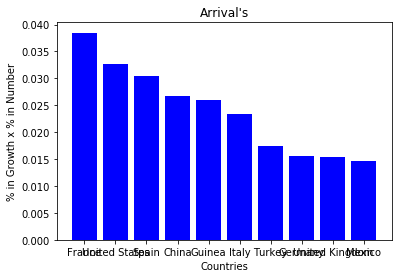

In [5]:
#get the best 10 results in Arrivals
arrival_top_10 = Arrivals_in_growth_vs_arrivals.iloc[0:10,:]

#get the best 10 results in income
income_top_10 = income_in_growth_vs_income.iloc[0:10,:]


# plotting the points 
plt.bar(arrival_top_10.index.values, arrival_top_10['Growth x Avarage'], color='blue')

#Resize the figure to 50x20
plt.rcParams['figure.figsize'] = (30,10)

 
# naming the x axis 
plt.xlabel('Countries') 

# naming the y axis 
plt.ylabel('% in Growth x % in Number') 
  
# giving a title
plt.title("Arrival's") 

#Save it in a png file for better view
plt.savefig('Arrivals.png')

# function to show the plot 
plt.show() 



second plot

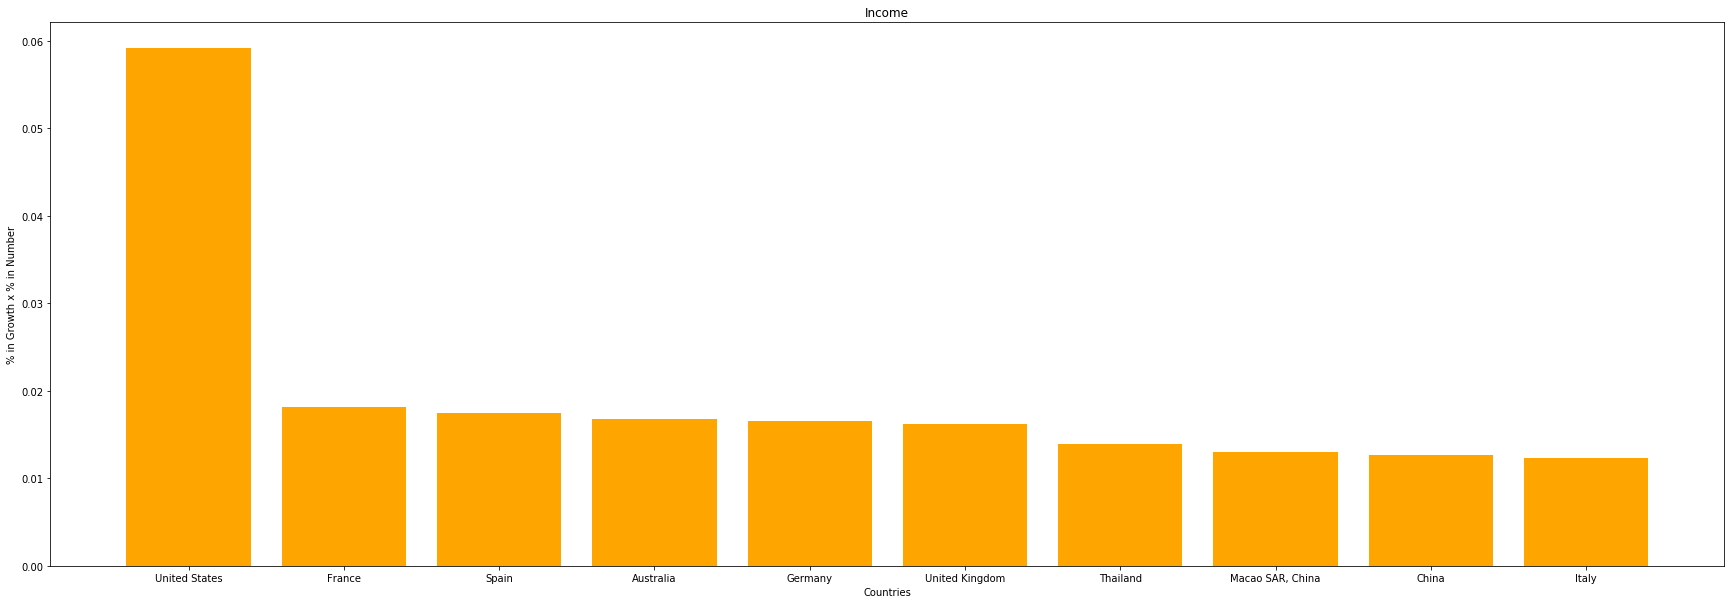

In [6]:
# plotting the points 
plt.bar(income_top_10.index.values, income_top_10['Growth x Avarage x Avg Exp'], color='orange')

#Resize the figure to 50x20
plt.rcParams['figure.figsize'] = (30,10)

# naming the x axis 
plt.xlabel('Countries') 

# naming the y axis 
plt.ylabel('% in Growth x % in Number') 
  
# giving a title 
plt.title('Income') 

#Save it in a png file for better view
plt.savefig('Income.png')

# function to show the plot 
plt.show() 



third plot

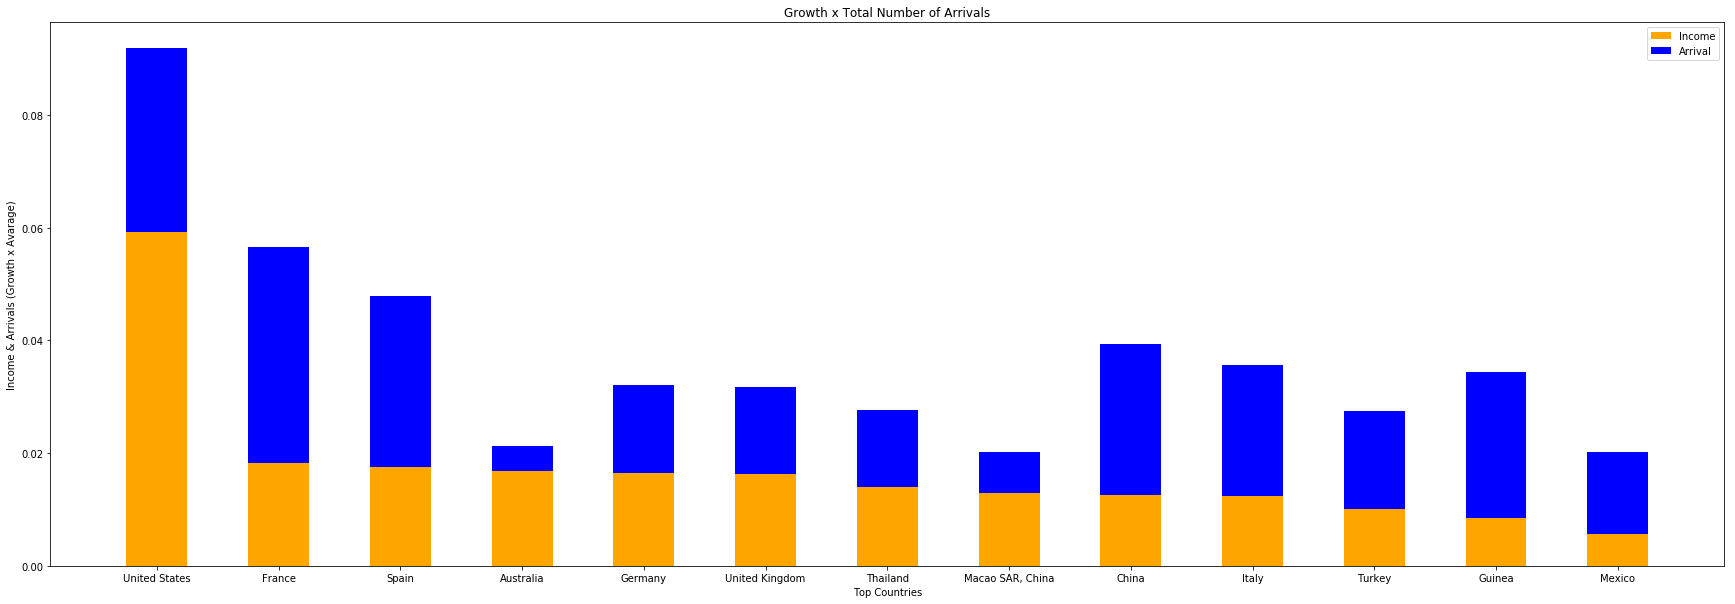

In [7]:

#Create a list with unique countries in arrival_top_10 + income_top_10
label_array = list(set(list(arrival_top_10.index.values)+ list(income_top_10.index.values)))


#Create a dataframe with the sum of top arrivals + top income
Arrivals_plus_income = pd.DataFrame(index=label_array)
Arrivals_plus_income['Arrivals GxA'] = arrivals_df['Growth x Avarage']
Arrivals_plus_income['Income GxA'] = income_df['Growth x Avarage x Avg Exp']

#sort the DataFrame by income
Arrivals_plus_income = Arrivals_plus_income.sort_values('Income GxA', ascending =False)



#Plot  income Values on a Bar chart
plt.bar(Arrivals_plus_income.index.values, Arrivals_plus_income['Income GxA'], width=0.5,
        label='Income', color='orange')

#Plot  Arrivals Values on a Bar chart
plt.bar(Arrivals_plus_income.index.values, Arrivals_plus_income['Arrivals GxA'], width=0.5,
        label='Arrival', bottom=Arrivals_plus_income['Income GxA'], color='blue')

#Resize the figure to 100x20
plt.rcParams['figure.figsize'] = (30,10)

# naming the x axis 
plt.xlabel('Top Countries') 

# naming the y axis 
plt.ylabel('Income & Arrivals (Growth x Avarage)') 
  
# giving a title
plt.title('Growth x Total Number of Arrivals') 

#Put legend
plt.legend()

#Save it in a png file for better view
plt.savefig('Arrivals x Income.png')


# function to show the plot 
plt.show() 
    